In [3]:
import cv2
from matplotlib import pyplot as plt
from skimage.segmentation import clear_border
import numpy as np
import sys

np.set_printoptions(threshold=sys.maxsize)

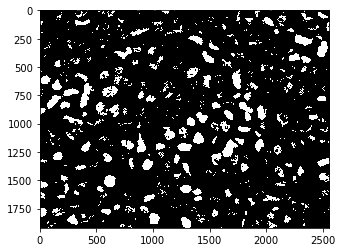

In [4]:
img = cv2.imread("3.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# gray_correct = np.array(255 * (gray / 255) ** 1.2 , dtype='uint8')

ret, thres = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

thres1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 15)
thres1 = cv2.bitwise_not(thres1)

# plt.subplot(1, 3, 1)
# plt.imshow(gray, cmap="gray")
# plt.subplot(1, 3, 2)
# plt.imshow(thres, cmap="gray")
# plt.subplot(1, 3, 3)
plt.imshow(thres1, cmap="gray")

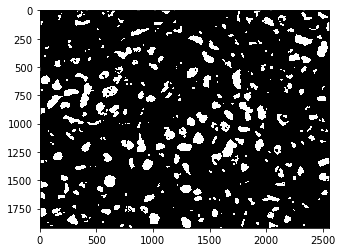

In [65]:
kernel = np.ones((3,3), np.uint8)
kernel1 = np.ones((3,3), np.uint8)
# if we increase iterations smaller nuclei will go off sometimes
opening = cv2.morphologyEx(thres, cv2.MORPH_OPEN, kernel, iterations=2)
# opening = clear_border(opening)

# opening1 = cv2.morphologyEx(thres1, cv2.MORPH_OPEN, kernel1, iterations=1)
img_dilation = cv2.dilate(thres1, kernel1, iterations=1)
img_erode = cv2.erode(img_dilation,kernel1, iterations=1)
# clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 7)

kernel11 = np.ones((3,3), np.uint8)
opening1 = cv2.morphologyEx(img_erode, cv2.MORPH_OPEN, kernel11, iterations=4)

# plt.subplot(1, 2, 1)
# plt.imshow(opening, cmap="gray")
# plt.subplot(1, 2, 2)
plt.imshow(opening1, cmap="gray")

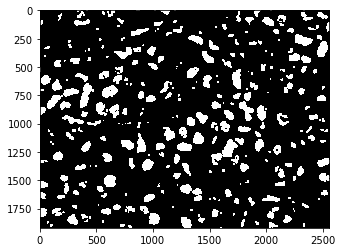

In [66]:
sure_bg = cv2.dilate(opening, kernel, iterations=10)

sure_bg1 = cv2.dilate(opening1, kernel11, iterations=2)

# plt.subplot(1, 2, 1)
# plt.imshow(sure_bg, cmap="gray")
# plt.subplot(1, 2, 2)
plt.imshow(sure_bg1, cmap="gray")

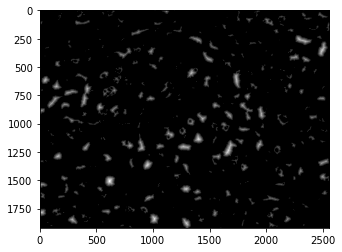

In [67]:
dist_trans = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

dist_trans1 = cv2.distanceTransform(opening1, cv2.DIST_L2, 5)

# plt.subplot(1, 2, 1)
# plt.imshow(dist_trans, cmap="gray")
# plt.subplot(1, 2, 2)
plt.imshow(dist_trans1, cmap="gray")

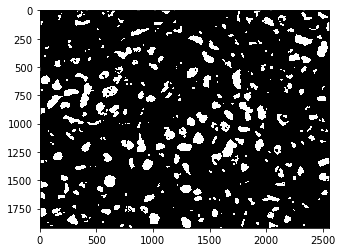

In [68]:
ret, sure_fg = cv2.threshold(dist_trans, 0.2*dist_trans.max(), 255, 0)

# ret1, sure_fg1 = cv2.threshold(dist_trans1, 0.1*dist_trans1.max(), 255, 0)
ret1, sure_fg1 = cv2.threshold(dist_trans1, 0.01*dist_trans1.max(), 255, 0)

# plt.subplot(1, 2, 1)
# plt.imshow(sure_fg, cmap="gray")
# plt.subplot(1, 2, 2)
plt.imshow(sure_fg1, cmap="gray")

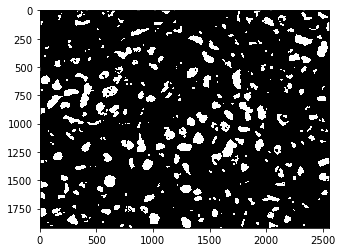

In [69]:
sure_fg = np.uint8(sure_fg)

sure_fg1 = np.uint8(sure_fg1)

# plt.subplot(1, 2, 1)
# plt.imshow(sure_fg, cmap="gray")
# plt.subplot(1, 2, 2)
plt.imshow(sure_fg1, cmap="gray")

103 328


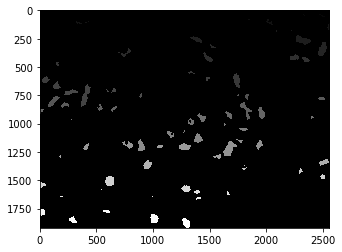

In [70]:
ret2, labels = cv2.connectedComponents(sure_fg)

ret3, labels1 = cv2.connectedComponents(sure_fg1)

print(ret2-1, ret3-1)
# plt.subplot(1, 2, 1)
plt.imshow(labels, cmap="gray")
# plt.subplot(1, 2, 2)
# plt.imshow(labels1, cmap="gray")

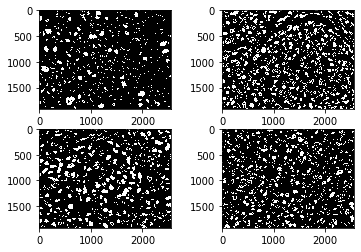

In [198]:
images = ['1.jpg', '2.jpg', '3.jpg', '4.jpg']

i=0
for image in images:
    img = cv2.imread(image)
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    if(image=='1.jpg'):
        thresh = 120
        thresh1 = 10
    if(image=='2.jpg'):
        thresh = 120
        thresh1 = 10
    if(image =='3.jpg'):
        thresh=120
        thresh1 = 10
    if(image=='4.jpg'):
        thresh=125
        thresh1 = 10
    ret, thres = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY_INV)
    
    thres1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, thresh1)
    thres1 = cv2.bitwise_not(thres1)
    
    i=i+1
    plt.subplot(2, 2, i)
    plt.imshow(thres1, cmap="gray")